# Assignment 1
### PHY408 Winter 26
### Jack Cheng 1010266695

In [15]:
print("hello to PHY408 wish me luck this sem")

hello to PHY408 wish me luck this sem


***

## Question 1

Download and load a dataset of daily temperature observations. Plot the observations in a figure with appropriate titles, axis labels, and legends.

(a) [1 point] Load the data using the numpy library and plot it using the matplotlib library. Add a title, labels and legends to the plot as needed.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

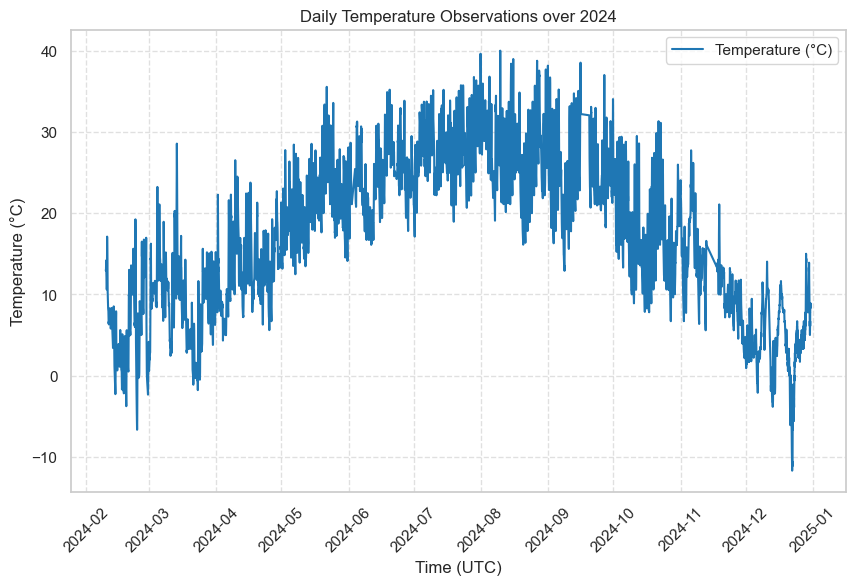

In [17]:
# Path to the dataset
file_path = 'data/sensor_mp8_temperature_2024.csv'

# Load the data using numpy
data = np.genfromtxt(file_path, delimiter=',', names=True, dtype=None, encoding='utf-8')

# Extracting values
temperatures = data['state']
timestamps_raw = data['last_changed']

# Convert ISO timestamps to datetime objects for accurate plotting
timestamps = [datetime.strptime(ts, "%Y-%m-%dT%H:%M:%S.%fZ") for ts in timestamps_raw]

plt.figure(figsize=(10, 6))
plt.plot(timestamps, temperatures, marker='', linestyle='-', color='tab:blue', label='Temperature (°C)')

plt.title('Daily Temperature Observations over 2024')
plt.xlabel('Time (UTC)')
plt.ylabel('Temperature (°C)')
plt.legend()

# Format x-axis
plt.xticks(rotation=45)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

(b) [1 point] Load the data from the file using the pandas library and plot it using the seaborn library (you will probably still need numpy and matplotlib libraries). Add a title, labels and legends to the plot as needed.

In [18]:
import pandas as pd
import seaborn as sns

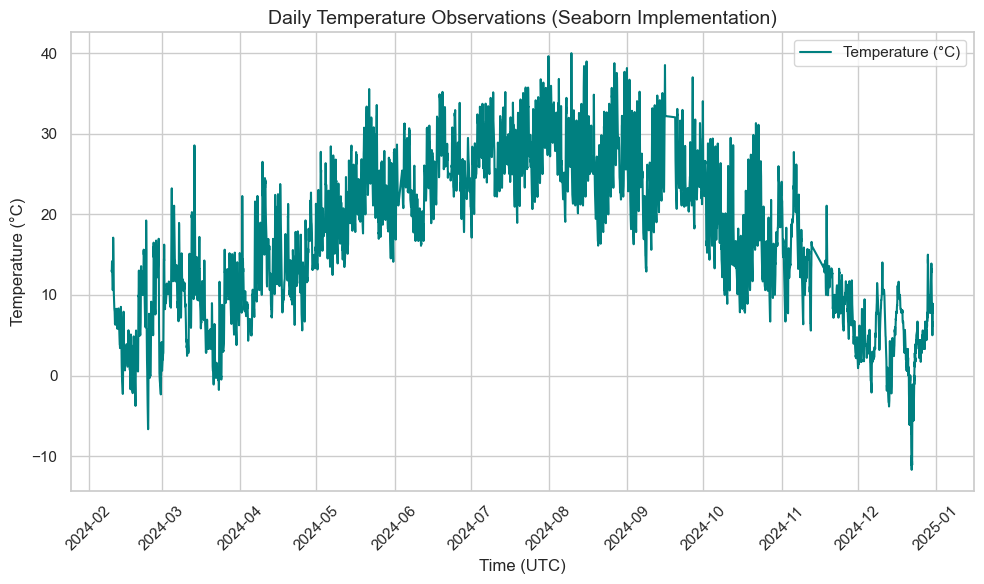

In [19]:
# 1. Load the data using pandas
# parse_dates automatically handles the ISO timestamp conversion for us
df = pd.read_csv('data/sensor_mp8_temperature_2024.csv', parse_dates=['last_changed'])

# 2. Set the visual style using seaborn
sns.set_theme(style="whitegrid")

# 3. Create the plot
plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(
    data=df, 
    x='last_changed', 
    y='state', 
    marker='', 
    label='Temperature (°C)',
    color='teal'
)

# 4. Add titles and labels
plt.title('Daily Temperature Observations (Seaborn Implementation)', fontsize=14)
plt.xlabel('Time (UTC)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# 5. Fine-tune formatting
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Save and show
plt.tight_layout()
plt.show()

***

## Question 2

(a) [2 points] Write a Python function to calculate the integral of a provided dataset using the Trapezium rule and Simpson’s rule. Test your code by generating the values for sin(t) function with 128 intervals from 0 to 180 degrees. Print the results from calling the function to calculate the integral.

In [20]:
def my_trapezoidal(x, y):
    """
    From inputs x, y calculate an integral with trapezoidal rule
    Condition: the intervals should be equally spaced.
    """
    a = x[0]
    b = x[-1]
    N = len(x) - 1

    h = (b-a)/N                 # width of slice
    s = 0.5*y[0] + 0.5*y[-1]     # the end bits
    for k in range(1,N):        # adding the interior bits
        s += y[k]

    return s * h

def my_simpson(x, y):
    """
    From inputs x, y calculate an integral with simpson rule.
    Condition: the intervals should be equally spaced.
    """
    a = x[0]
    b = x[-1]
    N = len(x) - 1

    assert N % 2 == 0, "N must be even"

    h = (b-a)/N 
    s = y[0] + y[-1]  

    odd = 0
    for i in range(1,N,2):
        odd += y[i]

    even = 0
    for j in range(2,N,2): 
        even += y[j]

    s += 4*odd + 2*even

    return (s * h) / 3


def f(x):
    """
    The function to integrate is sin.
    """
    return np.sin(x)


x = np.linspace(0, 2*np.pi, 129)
y = f(x)

trap_int = my_trapezoidal(x, y)
simp_int = my_simpson(x, y)

print("Trapezoidal Rule result:", trap_int)
print("Simpson's Rule result:", simp_int)



Trapezoidal Rule result: 3.661580698593046e-16
Simpson's Rule result: -1.0301224787310291e-16


(b) [2 points] The scipy library provides integral functions for Trapezium and Simpson’s rule. Calculate the integral of your generated sine dataset using these functions and print the results.

In [21]:
from scipy import integrate

In [22]:
x = np.linspace(0, 2*np.pi, 129)
y = f(x)

trapz_integral = integrate.trapezoid(y, x)
simpson_integral = integrate.simpson(y, x)

print(f"Trapezoidal Integral: {trapz_integral}")
print(f"Simpson's Integral: {simpson_integral}")

Trapezoidal Integral: 1.973247953923618e-17
Simpson's Integral: 6.765421556309548e-17


(c) [2 points] For each of the integrations functions above (Naive/Riemann, your 2 functions, 2 scipy functions), calculate the integral for a range of intervals from 8 to 1024 in powers of 2. Plot the integral value as a function of the number of intervals for each method on the same plot. Make each line identifiable, include a legend and appropriate axis labels and ticks.

In [23]:
def my_riemann(x,y):
    """
    From inputs x, y calculate an integral with a riemann sum
    Condition: the intervals are evenly spaced
    """
    a = x[0]
    b = x[-1]
    N = len(x) - 1
    
    h = (b - a) / N 
    
    # Left riemann sum
    total_sum = np.sum(y[:-1])
    
    return total_sum * h

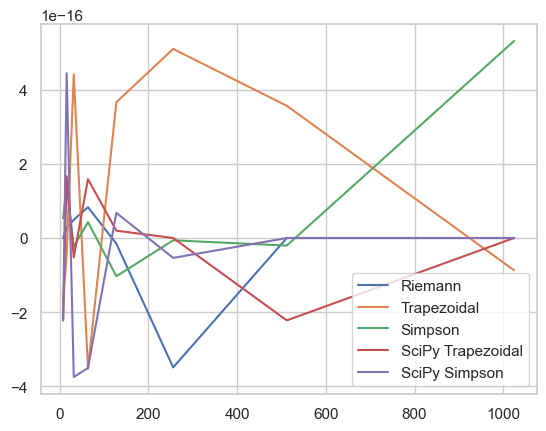

In [24]:
power_of_two = np.arange(3, 11)

my_riemann_curve = []
my_trapz_curve = []
my_simpson_curve = []
sci_trapz_curve = []
sci_simpson_curve = []

for n in power_of_two:
    x = np.linspace(0, 2*np.pi, (2**n) + 1)
    y = f(x)

    my_riemann_curve.append(my_riemann(x, y))
    my_trapz_curve.append(my_trapezoidal(x, y))
    my_simpson_curve.append(my_simpson(x, y))
    sci_trapz_curve.append(integrate.trapezoid(y, x))
    sci_simpson_curve.append(integrate.simpson(y, x))


plt.plot(2**power_of_two, my_riemann_curve,label='Riemann')
plt.plot(2**power_of_two, my_trapz_curve,label='Trapezoidal')
plt.plot(2**power_of_two, my_simpson_curve,label='Simpson')
plt.plot(2**power_of_two, sci_trapz_curve,label='SciPy Trapezoidal')
plt.plot(2**power_of_two, sci_simpson_curve,label='SciPy Simpson')

plt.legend()

    
    

***

## Question 3

The frequency of sampling data can affect any values derived from the data. In this question you will generate a sample of data from a cosine function and simulate the effect of coarse sampling and poor sampling.

(a) [2 points] Generate a sample of data $g (t) = cos(2πft)$ at a sampling interval of $dt = 1s$ for frequency values of $f = 0, 0.25, 0.5, 0.75, 1.0Hz$. In separate plots, plot the coarsely sampled g (t ) data as red circles, as well as a much higher resolution ‘ground truth’ $g (t)$ sampled with $d t = 0.05s$. For each frequency you test, comment on whether the coarse sampling captures the original dataset faithfully (define this!).

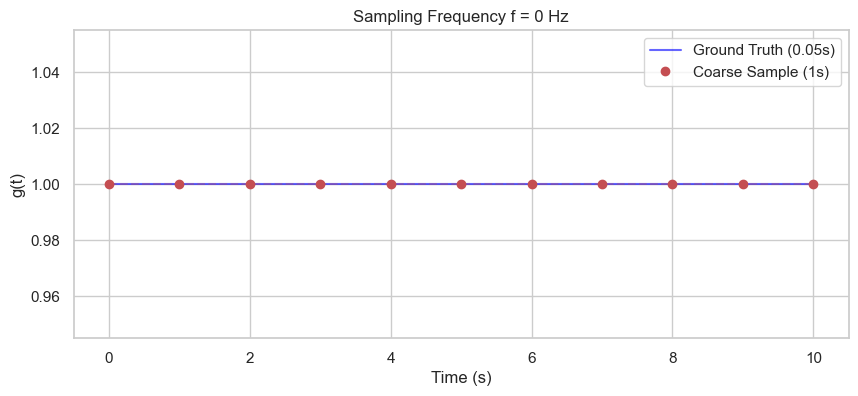

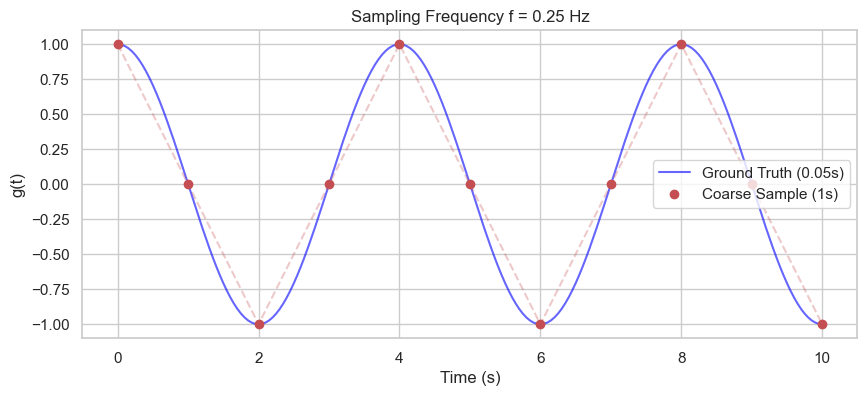

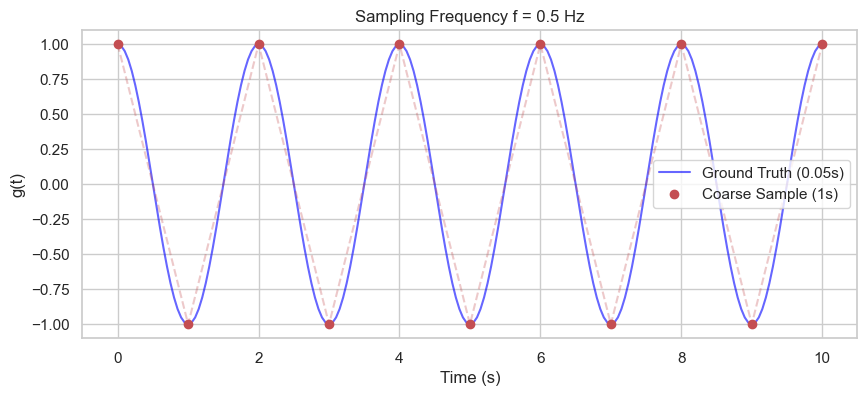

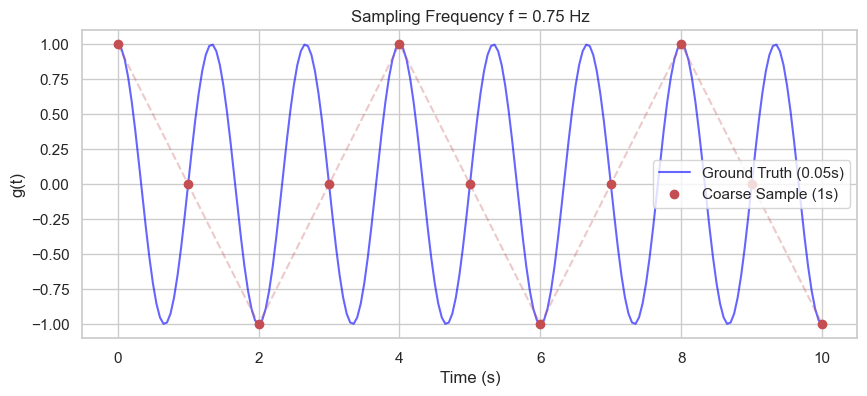

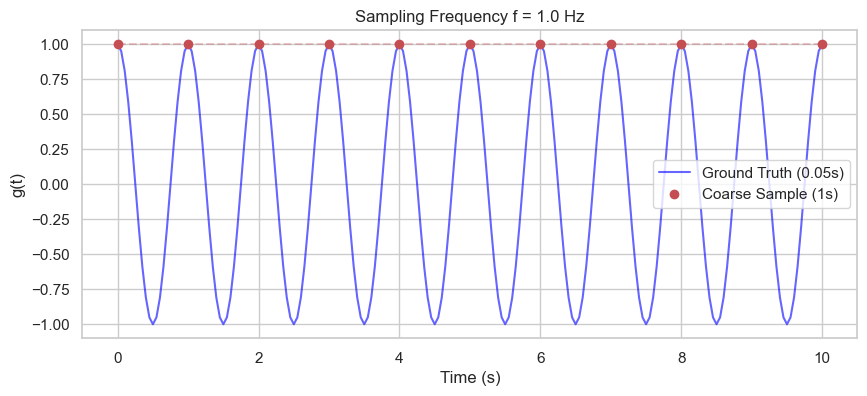

In [25]:
# Frequencies to test
frequencies = [0, 0.25, 0.5, 0.75, 1.0]

# Time parameters
t_start = 0
t_end = 10  # 10 seconds to see multiple cycles
dt_coarse = 1.0
dt_fine = 0.05

t_coarse_list = []
g_coarse_list = []

for f in frequencies:
    # Generate time arrays
    t_fine = np.arange(t_start, t_end + dt_fine, dt_fine)
    t_coarse = np.arange(t_start, t_end + dt_coarse, dt_coarse)
    
    # Generate g(t) = cos(2*pi*f*t)
    g_fine = np.cos(2 * np.pi * f * t_fine)
    g_coarse = np.cos(2 * np.pi * f * t_coarse)

    t_coarse_list.append(t_coarse)
    g_coarse_list.append(g_coarse)
    
    # Plotting
    plt.figure(figsize=(10, 4))
    plt.plot(t_fine, g_fine, label='Ground Truth (0.05s)', color='blue', alpha=0.6)
    plt.plot(t_coarse, g_coarse, 'ro', label='Coarse Sample (1s)')
    plt.plot(t_coarse, g_coarse, 'r--', alpha=0.3)
    
    plt.title(f"Sampling Frequency f = {f} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("g(t)")
    plt.legend()
    plt.grid(True)
    plt.show()

it appears that it roughly follows the shape until 0.5Hz

(b) [2 points] For each of the coarsely sampled datasets, calculate the average value over the entire dataset, and estimate the frequency and amplitude of the data. To estimate the frequency you can find the length of time the sampled data takes to repeat, and the apparent frequency will be related to the inverse of this time. What is the maximum frequency you can correctly sample with the sampling rate of $dt = 1s$?

In [26]:
dt_sampling = 1.0

print(f"{'True f (Hz)':<12} | {'Average':<10} | {'Amp':<6} | {'Apparent f (Hz)':<15}")
print("-" * 55)

for i, f_true in enumerate(frequencies):
    t_data = t_coarse_list[i]
    g_data = g_coarse_list[i]
    
    avg_val = np.mean(g_data)
    
    amp_est = (np.max(g_data) - np.min(g_data)) / 2
    
    repeats = np.where(np.isclose(g_data[1:], 1.0, atol=1e-5))[0]
    
    if len(repeats) > 0:
        apparent_period = t_data[repeats[0] + 1] - t_data[0]
        apparent_f = 1 / apparent_period
    else:
        apparent_f = 0.0

    print(f"{f_true:<12} | {avg_val:<10.3f} | {amp_est:<6.2f} | {apparent_f:<15.3f}")


True f (Hz)  | Average    | Amp    | Apparent f (Hz)
-------------------------------------------------------
0            | 1.000      | 0.00   | 1.000          
0.25         | 0.000      | 1.00   | 0.250          
0.5          | 0.091      | 1.00   | 0.500          
0.75         | -0.000     | 1.00   | 0.250          
1.0          | 1.000      | 0.00   | 1.000          


This code supports the notion that doesn't quite work for frequencies larger than 0.5. The average, or the apparent f is wrong.

(c) [2 points] For frequency values around your estimated maximum, generate new samples at $f = f_{max} − 0.1, f_{max} + 0.1$ and repeat part b. What are the estimated frequencies this time?

C:\Users\21chengjk1\AppData\Local\Temp\ipykernel_8892\1075335331.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(t_fine, g_fine, 'b-', label='Ground Truth', color='blue', alpha=0.6)


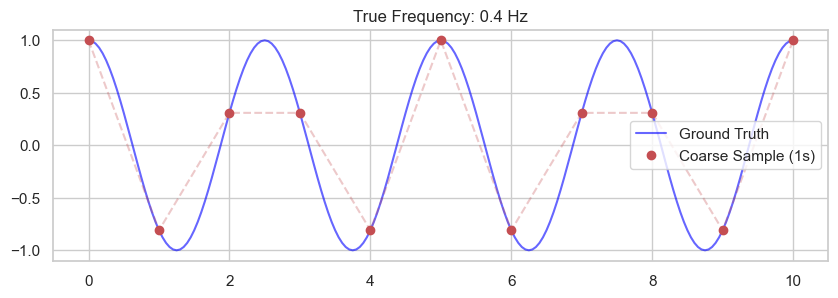

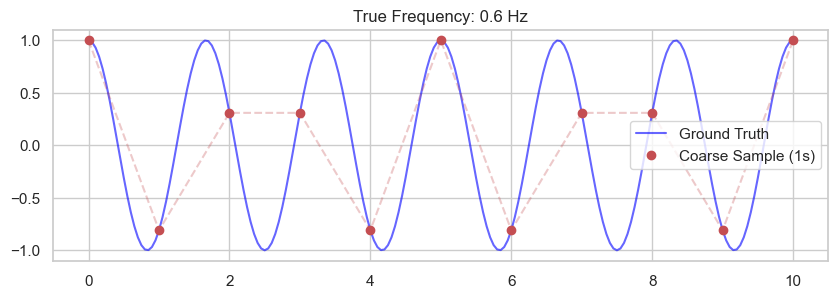

In [27]:
# New frequencies to test around 0.5 Hz
f_max = 0.5
test_frequencies = [f_max - 0.1, f_max + 0.1] # 0.4 Hz and 0.6 Hz

for f_true in test_frequencies:
    # Generate time arrays
    t_fine = np.arange(t_start, t_end + dt_fine, dt_fine)
    t_coarse = np.arange(t_start, t_end + dt_coarse, dt_coarse)
    
    # Generate data
    g_fine = np.cos(2 * np.pi * f_true * t_fine)
    g_coarse = np.cos(2 * np.pi * f_true * t_coarse)
    

    # Plotting
    plt.figure(figsize=(10, 3))

    plt.plot(t_fine, g_fine, 'b-', label='Ground Truth', color='blue', alpha=0.6)
    plt.plot(t_coarse, g_coarse, 'ro', label='Coarse Sample (1s)')
    plt.plot(t_coarse, g_coarse, 'r--', alpha=0.3)


    plt.title(f"True Frequency: {f_true} Hz")
    plt.legend()
    plt.show()

The two sampled graphs are indistinguishable. Even though it doesn't line up as neatly, one might be able to extract the information that the sampled data repeats twice in 5 seconds.

$apparent f = \frac{2}{5} = 0.4Hz$ and this is true for both.

This further suggests that we are only able to properly sampling interval only works for frequencies up to 0.5Hz.